# Fill in the MyStrategy Class below to specify your strategy logic

In [1]:

from strategy import *
from BaseStrategy import BaseStrategy

class MyStrategy(BaseStrategy):
    def __init__(self, strategy_actions):
        self.small_window = 40
        self.big_window = 100
        self.small_sum = 0.0
        self.big_sum = 0.0
        self.stock_size = 0
        self.revenue = 0.0
        self.capital = 0.0
        self.trade_times = 0
        self.inc = 0
        self.small_set = []
        self.big_set = []

        super().__init__(strategy_actions)

    def OnResetStrategyState(self):
        pass
        
    # Set flags before the strategy is started
    def SetFlags(self):
        pass

    def OnTrade(self, msg):

        instrument = msg.instrument(); 
        mid_price = (instrument.top_quote().ask() + instrument.top_quote().bid()) / 2
        
        self.small_sum += mid_price
        self.big_sum += mid_price
            
        #iterating over symbols in python
        for symbol in self.symbols(): 
            print(symbol)
        
        self.small_set.append(mid_price)
        self.big_set.append(mid_price)

        if len(self.small_set) > self.small_window: 
            self.small_sum -= self.small_set.pop()
       
        if len(self.big_set) > self.big_window: 
            self.big_sum -= self.big_set.pop()

        small_average = self.small_sum / len(self.small_set)
        big_average = self.big_sum / len(self.big_set)

        if small_average > big_average:
            self.SendOrder(instrument, 100)    
            self.stock_size += 100
            self.revenue -= instrument.top_quote().ask() * 100
            self.trade_times += 1 

        elif small_average < big_average and self.stock_size > 0:
            self.SendOrder(instrument, -100)    
            self.stock_size -= 100
            self.revenue += instrument.top_quote().bid() * 100
            self.trade_times += 1 
        
        self.capital = self.stock_size * instrument.top_quote().bid() + self.revenue

        print("Capital = " + str(self.capital) + " size = " + str(self.stock_size) + " trade times = " + str(self.trade_times))
        
        pass


    def OnTopQuote(self, msg):
        pass
       
    def OnQuote(self, msg): 
        pass
    
    def OnBar(self, msg): 
        pass

    def OnDepth(self, msg):
        pass
    
    def OnResetStrategyState(self): 
        pass

    def OnOrderUpdate(self, msg): 
        pass
    
    def OnResetStrategyState(self): 
        pass

    def RegisterForStrategyEvents(self, eventRegister, currDate):
        pass
    
    def SendOrder(self, instrument, trade_size): 
        price = 0
        action = ""

        if trade_size > 0: # buy 
            price = instrument.top_quote().ask()
            action = "buy"
        else: # sell
            price = instrument.top_quote().bid()
            action = "sell"
        
        params = OrderParams(instrument, abs(trade_size), price, MARKET_CENTER_ID_IEX, (ORDER_SIDE_BUY if trade_size > 0 else ORDER_SIDE_SELL), ORDER_TIF_DAY, ORDER_TYPE_LIMIT)

        print("SendTradeOrder(): about to send new order for size " + str(trade_size) + " at $" + str(price) + " to " + str(action) + " " + instrument.symbol())
        
        self.trade_actions().SendNewOrder(params)
        pass

    def OnNews(self, msg):
        pass  



ModuleNotFoundError: No module named 'strategy'

# Run the cell below to export your strategy and run a backtest

In [2]:
# Run Script
!./runstrat.sh

/Users/rishabrao/opt/anaconda3/lib/python3.9/site-packages/traitlets/traitlets.py:2562: FutureWarning: --TagRemovePreprocessor.remove_cell_tags={"remove"} for containers is deprecated in traitlets 5.0. You can pass `--TagRemovePreprocessor.remove_cell_tags item` ... multiple times to add items to a list.
  warn(
[NbConvertApp] Converting notebook your_strategy.ipynb to python
[NbConvertApp] Writing 3404 bytes to ../MyStrategy.py
Great! You properly cloned the repo using --recursive!
You already have your ssh key! great!
Great! You already downloaded the Strategy Studio SDK
Great! You already downloaded the Strategy Studio Backtesting Engine!
Great! You already placed your license.txt file in this folder!
Compressing PybindStrategy
All dependencies are met! Launching VM!!
Bringing up VM
declare -x VAGRANT_CHECKPOINT_DISABLE="1"
declare -x VAGRANT_HOME="/Users/rishabrao/dev/group_02_project/strategystudioubuntu2004/vagrant_home"
Bringing machine 'default' up with 'virtualbox' provider...

Login received from connection id 0
Starting backtest experiment 1 running 1 strategy with start date 2021-Nov-05 and end date 2021-Nov-05
DataSourceMgr::BuildDataSource: Received request to build data source BacktesterReader for processor id 1
Started backtest experiment 1 with start date 2021-Nov-05 and end date 2021-Nov-05

Quitting.
Connection id 0 finished.
Connection id 1 finished.
Last line found:,187
Sleeping for 10 seconds...
AAPL
Capital = 0.0 size = 0 trade times = 0
AAPL
Capital = 0.0 size = 0 trade times = 0
AAPL
Capital = 0.0 size = 0 trade times = 0
AAPL
Capital = 0.0 size = 0 trade times = 0
AAPL
Capital = 0.0 size = 0 trade times = 0
AAPL
Capital = 0.0 size = 0 trade times = 0
AAPL
Capital = 0.0 size = 0 trade times = 0
AAPL
Capital = 0.0 size = 0 trade times = 0
AAPL
Capital = 0.0 size = 0 trade times = 0
AAPL
Capital = 0.0 size = 0 trade times = 0
AAPL
Capital = 0.0 size = 0 trade times = 0
AAPL
Capital = 0.0 size = 0 trade times = 0
AAPL
Capital = 0.0 size = 0 trade

AAPL
SendTradeOrder(): about to send new order for size 100 at $151.74 to buy AAPL
Capital = -28753.0 size = 6000 trade times = 66
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.74 to buy AAPL
Capital = -29161.0 size = 6100 trade times = 67
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.74 to buy AAPL
Capital = -29569.0 size = 6200 trade times = 68
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.74 to buy AAPL
Capital = -29977.0 size = 6300 trade times = 69
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.74 to buy AAPL
Capital = -5296.999999999884 size = 6400 trade times = 70
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.74 to buy AAPL
Capital = -30793.0 size = 6500 trade times = 71
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.74 to buy AAPL
Capital = -5395.0 size = 6600 trade times = 72
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.74 to 

AAPL
SendTradeOrder(): about to send new order for size 100 at $152.16 to buy AAPL
Capital = 302.99999999976717 size = 12900 trade times = 135
AAPL
SendTradeOrder(): about to send new order for size 100 at $152.19 to buy AAPL
Capital = 687.9999999997672 size = 13000 trade times = 136
AAPL
SendTradeOrder(): about to send new order for size 100 at $152.18 to buy AAPL
Capital = 556.0 size = 13100 trade times = 137
AAPL
SendTradeOrder(): about to send new order for size 100 at $152.18 to buy AAPL
Capital = 554.0 size = 13200 trade times = 138
AAPL
SendTradeOrder(): about to send new order for size 100 at $152.18 to buy AAPL
Capital = 552.0 size = 13300 trade times = 139
AAPL
SendTradeOrder(): about to send new order for size 100 at $152.18 to buy AAPL
Capital = 14.0 size = 13400 trade times = 140
AAPL
SendTradeOrder(): about to send new order for size 100 at $152.18 to buy AAPL
Capital = 8.0 size = 13500 trade times = 141
AAPL
SendTradeOrder(): about to send new order for size 100 at $152.

AAPL
SendTradeOrder(): about to send new order for size 100 at $151.92 to buy AAPL
Capital = -2495.0 size = 20200 trade times = 208
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.9 to buy AAPL
Capital = -2901.0 size = 20300 trade times = 209
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.91 to buy AAPL
Capital = -2700.0000000004657 size = 20400 trade times = 210
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.91 to buy AAPL
Capital = -2702.0000000004657 size = 20500 trade times = 211
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.87 to buy AAPL
Capital = -3730.0 size = 20600 trade times = 212
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.86 to buy AAPL
Capital = -3732.0 size = 20700 trade times = 213
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.87 to buy AAPL
Capital = -3527.0 size = 20800 trade times = 214
AAPL
SendTradeOrder(): about to send new order for si

AAPL
SendTradeOrder(): about to send new order for size 100 at $151.64 to buy AAPL
Capital = -10271.999999999534 size = 26700 trade times = 273
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.64 to buy AAPL
Capital = -10277.999999999534 size = 26800 trade times = 274
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.7 to buy AAPL
Capital = -8138.0 size = 26900 trade times = 275
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.69 to buy AAPL
Capital = -7601.0 size = 27000 trade times = 276
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.69 to buy AAPL
Capital = -7602.0 size = 27100 trade times = 277
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.68 to buy AAPL
Capital = -8690.000000000466 size = 27200 trade times = 278
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.68 to buy AAPL
Capital = -8694.000000000466 size = 27300 trade times = 279
AAPL
SendTradeOrder(): about to

AAPL
SendTradeOrder(): about to send new order for size 100 at $151.9 to buy AAPL
Capital = -1909.0 size = 34000 trade times = 346
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.9 to buy AAPL
Capital = -1911.0 size = 34100 trade times = 347
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.9 to buy AAPL
Capital = -1571.0000000009313 size = 34200 trade times = 348
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.94 to buy AAPL
Capital = -890.0 size = 34300 trade times = 349
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.94 to buy AAPL
Capital = -893.0 size = 34400 trade times = 350
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.95 to buy AAPL
Capital = -552.0 size = 34500 trade times = 351
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.95 to buy AAPL
Capital = -209.0 size = 34600 trade times = 352
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.95 

SendTradeOrder(): about to send new order for size 100 at $151.75 to buy AAPL
Capital = -8434.0 size = 43900 trade times = 445
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.72 to buy AAPL
Capital = -10194.0 size = 44000 trade times = 446
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.74 to buy AAPL
Capital = -8436.0 size = 44100 trade times = 447
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.78 to buy AAPL
Capital = -7116.0 size = 44200 trade times = 448
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.78 to buy AAPL
Capital = -7562.0 size = 44300 trade times = 449
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.8 to buy AAPL
Capital = -6236.0 size = 44400 trade times = 450
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.8 to buy AAPL
Capital = -7574.0 size = 44500 trade times = 451
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.79 to buy AAPL

AAPL
SendTradeOrder(): about to send new order for size 100 at $151.75 to buy AAPL
Capital = -8369.0 size = 51900 trade times = 525
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.78 to buy AAPL
Capital = -7334.999999999069 size = 52000 trade times = 526
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.75 to buy AAPL
Capital = -7335.999999999069 size = 52100 trade times = 527
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.78 to buy AAPL
Capital = -6296.000000000931 size = 52200 trade times = 528
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.71 to buy AAPL
Capital = -10475.0 size = 52300 trade times = 529
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.68 to buy AAPL
Capital = -12571.000000000931 size = 52400 trade times = 530
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.66 to buy AAPL
Capital = -13098.0 size = 52500 trade times = 531
AAPL
SendTradeOrder(): about 

AAPL
SendTradeOrder(): about to send new order for size 100 at $151.41 to buy AAPL
Capital = -26824.0 size = 60000 trade times = 606
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.42 to buy AAPL
Capital = -26828.0 size = 60100 trade times = 607
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.44 to buy AAPL
Capital = -25630.0 size = 60200 trade times = 608
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.44 to buy AAPL
Capital = -25634.0 size = 60300 trade times = 609
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.44 to buy AAPL
Capital = -25638.0 size = 60400 trade times = 610
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.39 to buy AAPL
Capital = -251907.0 size = 60500 trade times = 611
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.4 to buy AAPL
Capital = -28061.0 size = 60600 trade times = 612
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.4

AAPL
SendTradeOrder(): about to send new order for size 100 at $151.73 to buy AAPL
Capital = -275978.0 size = 66600 trade times = 672
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.54 to buy AAPL
Capital = -276366.0 size = 66700 trade times = 673
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.53 to buy AAPL
Capital = -276753.0 size = 66800 trade times = 674
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.65 to buy AAPL
Capital = -18249.0 size = 66900 trade times = 675
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.55 to buy AAPL
Capital = -17581.0 size = 67000 trade times = 676
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.56 to buy AAPL
Capital = -277931.0 size = 67100 trade times = 677
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.56 to buy AAPL
Capital = -16913.0 size = 67200 trade times = 678
AAPL
SendTradeOrder(): about to send new order for size 100 at $1

SendTradeOrder(): about to send new order for size 100 at $151.41 to buy AAPL
Capital = -300795.0 size = 72800 trade times = 734
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.42 to buy AAPL
Capital = -29254.000000001863 size = 72900 trade times = 735
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.44 to buy AAPL
Capital = -27069.0 size = 73000 trade times = 736
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.65 to buy AAPL
Capital = -27092.0 size = 73100 trade times = 737
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.43 to buy AAPL
Capital = -27825.0 size = 73200 trade times = 738
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.65 to buy AAPL
Capital = -26383.0 size = 73300 trade times = 739
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.65 to buy AAPL
Capital = -26405.0 size = 73400 trade times = 740
AAPL
SendTradeOrder(): about to send new order for size 100 at

AAPL
SendTradeOrder(): about to send new order for size 100 at $151.44 to buy AAPL
Capital = -27885.0 size = 79100 trade times = 797
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.44 to buy AAPL
Capital = -27886.0 size = 79200 trade times = 798
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.49 to buy AAPL
Capital = -24720.0 size = 79300 trade times = 799
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.49 to buy AAPL
Capital = -24722.0 size = 79400 trade times = 800
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.49 to buy AAPL
Capital = -23929.0 size = 79500 trade times = 801
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.5 to buy AAPL
Capital = -23931.0 size = 79600 trade times = 802
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.51 to buy AAPL
Capital = -27919.0 size = 79700 trade times = 803
AAPL
SendTradeOrder(): about to send new order for size 100 at $152.1 

AAPL
SendTradeOrder(): about to send new order for size 100 at $151.32 to buy AAPL
Capital = -39416.0 size = 85700 trade times = 863
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.32 to buy AAPL
Capital = -41133.0 size = 85800 trade times = 864
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.32 to buy AAPL
Capital = -41136.0 size = 85900 trade times = 865
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.32 to buy AAPL
Capital = -41139.0 size = 86000 trade times = 866
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.48 to buy AAPL
Capital = -36853.0 size = 86100 trade times = 867
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.48 to buy AAPL
Capital = -36867.0 size = 86200 trade times = 868
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.36 to buy AAPL
Capital = -41184.0 size = 86300 trade times = 869
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.4

AAPL
SendTradeOrder(): about to send new order for size 100 at $151.34 to buy AAPL
Capital = -40427.0 size = 95800 trade times = 964
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.34 to buy AAPL
Capital = -40430.0 size = 95900 trade times = 965
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.34 to buy AAPL
Capital = -38512.99999999814 size = 96000 trade times = 966
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.34 to buy AAPL
Capital = -38513.99999999814 size = 96100 trade times = 967
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.35 to buy AAPL
Capital = -40440.0 size = 96200 trade times = 968
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.35 to buy AAPL
Capital = -40444.0 size = 96300 trade times = 969
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.37 to buy AAPL
Capital = -36594.0 size = 96400 trade times = 970
AAPL
SendTradeOrder(): about to send new order fo

AAPL
SendTradeOrder(): about to send new order for size 100 at $151.64 to buy AAPL
Capital = -9591.0 size = 103100 trade times = 1037
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.64 to buy AAPL
Capital = -10624.0 size = 103200 trade times = 1038
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.64 to buy AAPL
Capital = -419694.0 size = 103300 trade times = 1039
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.64 to buy AAPL
Capital = -420092.0 size = 103400 trade times = 1040
AAPL
SendTradeOrder(): about to send new order for size 100 at $152.1 to buy AAPL
Capital = -8606.000000001863 size = 103500 trade times = 1041
AAPL
SendTradeOrder(): about to send new order for size 100 at $152.1 to buy AAPL
Capital = -7616.0 size = 103600 trade times = 1042
AAPL
SendTradeOrder(): about to send new order for size 100 at $152.1 to buy AAPL
Capital = -7661.0 size = 103700 trade times = 1043
AAPL
SendTradeOrder(): about to send new order fo

Capital = -2877.0 size = 109200 trade times = 1098
AAPL
SendTradeOrder(): about to send new order for size 100 at $152.5 to buy AAPL
Capital = -2956.0 size = 109300 trade times = 1099
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.7 to buy AAPL
Capital = -5143.0 size = 109400 trade times = 1100
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.71 to buy AAPL
Capital = -75224.99999999814 size = 109500 trade times = 1101
AAPL
SendTradeOrder(): about to send new order for size 100 at $152.5 to buy AAPL
Capital = -75369.99999999814 size = 109600 trade times = 1102
AAPL
SendTradeOrder(): about to send new order for size 100 at $152.5 to buy AAPL
Capital = -4210.000000001863 size = 109700 trade times = 1103
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.71 to buy AAPL
Capital = -75580.99999999814 size = 109800 trade times = 1104
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.71 to buy AAPL
Capital = -75646.99999

AAPL
SendTradeOrder(): about to send new order for size 100 at $151.66 to buy AAPL
Capital = -16409.0 size = 117700 trade times = 1183
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.63 to buy AAPL
Capital = -15233.0 size = 117800 trade times = 1184
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.63 to buy AAPL
Capital = -17592.0 size = 117900 trade times = 1185
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.6 to buy AAPL
Capital = -23492.0 size = 118000 trade times = 1186
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.6 to buy AAPL
Capital = -18773.0 size = 118100 trade times = 1187
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.61 to buy AAPL
Capital = -17593.0 size = 118200 trade times = 1188
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.6 to buy AAPL
Capital = -18776.0 size = 118300 trade times = 1189
AAPL
SendTradeOrder(): about to send new order for size 10

AAPL
SendTradeOrder(): about to send new order for size 100 at $151.47 to buy AAPL
Capital = -36505.0 size = 124500 trade times = 1251
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.46 to buy AAPL
Capital = -36506.0 size = 124600 trade times = 1252
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.46 to buy AAPL
Capital = -55212.0 size = 124700 trade times = 1253
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.47 to buy AAPL
Capital = -55229.0 size = 124800 trade times = 1254
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.49 to buy AAPL
Capital = -34015.0 size = 124900 trade times = 1255
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.49 to buy AAPL
Capital = -34017.0 size = 125000 trade times = 1256
AAPL
SendTradeOrder(): about to send new order for size 100 at $152.6 to buy AAPL
Capital = -55397.0 size = 125100 trade times = 1257
AAPL
SendTradeOrder(): about to send new order for size 

AAPL
SendTradeOrder(): about to send new order for size 100 at $151.54 to buy AAPL
Capital = -35601.0 size = 131400 trade times = 1320
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.54 to buy AAPL
Capital = -35607.0 size = 131500 trade times = 1321
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.54 to buy AAPL
Capital = -35613.0 size = 131600 trade times = 1322
AAPL
SendTradeOrder(): about to send new order for size 100 at $152.6 to buy AAPL
Capital = -31774.0 size = 131700 trade times = 1323
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.47 to buy AAPL
Capital = -39678.0 size = 131800 trade times = 1324
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.47 to buy AAPL
Capital = -39680.0 size = 131900 trade times = 1325
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.51 to buy AAPL
Capital = -35726.0 size = 132000 trade times = 1326
AAPL
SendTradeOrder(): about to send new order for size 

AAPL
SendTradeOrder(): about to send new order for size 100 at $151.39 to buy AAPL
Capital = -95913.0 size = 139500 trade times = 1401
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.39 to buy AAPL
Capital = -95947.0 size = 139600 trade times = 1402
AAPL
SendTradeOrder(): about to send new order for size 100 at $152.1 to buy AAPL
Capital = -54142.0 size = 139700 trade times = 1403
AAPL
SendTradeOrder(): about to send new order for size 100 at $152.1 to buy AAPL
Capital = -59809.0 size = 139800 trade times = 1404
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.36 to buy AAPL
Capital = -55617.0 size = 139900 trade times = 1405
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.4 to buy AAPL
Capital = -58423.0 size = 140000 trade times = 1406
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.39 to buy AAPL
Capital = -58430.0 size = 140100 trade times = 1407
AAPL
SendTradeOrder(): about to send new order for size 10

AAPL
SendTradeOrder(): about to send new order for size 100 at $152.1 to buy AAPL
Capital = -100270.0 size = 147300 trade times = 1479
AAPL
SendTradeOrder(): about to send new order for size 100 at $152.1 to buy AAPL
Capital = -100375.0 size = 147400 trade times = 1480
AAPL
SendTradeOrder(): about to send new order for size 100 at $152.1 to buy AAPL
Capital = -76880.0 size = 147500 trade times = 1481
AAPL
SendTradeOrder(): about to send new order for size 100 at $152.1 to buy AAPL
Capital = -75493.0 size = 147600 trade times = 1482
AAPL
SendTradeOrder(): about to send new order for size 100 at $152.1 to buy AAPL
Capital = -74104.0 size = 147700 trade times = 1483
AAPL
SendTradeOrder(): about to send new order for size 100 at $152.1 to buy AAPL
Capital = -74191.0 size = 147800 trade times = 1484
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.24 to buy AAPL
Capital = -77150.0 size = 147900 trade times = 1485
AAPL
SendTradeOrder(): about to send new order for size 100

AAPL
SendTradeOrder(): about to send new order for size 100 at $151.1 to buy AAPL
Capital = -146031.0 size = 156600 trade times = 1572
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.1 to buy AAPL
Capital = -146062.0 size = 156700 trade times = 1573
AAPL
SendTradeOrder(): about to send new order for size 100 at $152.6 to buy AAPL
Capital = -99203.0 size = 156800 trade times = 1574
AAPL
SendTradeOrder(): about to send new order for size 100 at $152.6 to buy AAPL
Capital = -88371.0 size = 156900 trade times = 1575
AAPL
SendTradeOrder(): about to send new order for size 100 at $152.6 to buy AAPL
Capital = -88515.0 size = 157000 trade times = 1576
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.17 to buy AAPL
Capital = -90087.0 size = 157100 trade times = 1577
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.17 to buy AAPL
Capital = -88517.0 size = 157200 trade times = 1578
AAPL
SendTradeOrder(): about to send new order for size 10

AAPL
SendTradeOrder(): about to send new order for size 100 at $151.29 to buy AAPL
Capital = -104098.0 size = 163200 trade times = 1638
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.06 to buy AAPL
Capital = -107363.0 size = 163300 trade times = 1639
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.07 to buy AAPL
Capital = -110633.0 size = 163400 trade times = 1640
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.13 to buy AAPL
Capital = -97562.99999999627 size = 163500 trade times = 1641
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.13 to buy AAPL
Capital = -97564.99999999627 size = 163600 trade times = 1642
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.11 to buy AAPL
Capital = -131942.0 size = 163700 trade times = 1643
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.11 to buy AAPL
Capital = -131963.0 size = 163800 trade times = 1644
AAPL
SendTradeOrder(): about t

AAPL
SendTradeOrder(): about to send new order for size 100 at $151.03 to buy AAPL
Capital = -116247.0 size = 170000 trade times = 1706
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.29 to buy AAPL
Capital = -112874.0 size = 170100 trade times = 1707
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.08 to buy AAPL
Capital = -104370.0 size = 170200 trade times = 1708
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.09 to buy AAPL
Capital = -102668.99999999627 size = 170300 trade times = 1709
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.05 to buy AAPL
Capital = -111186.0 size = 170400 trade times = 1710
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.03 to buy AAPL
Capital = -116301.0 size = 170500 trade times = 1711
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.03 to buy AAPL
Capital = -116304.0 size = 170600 trade times = 1712
AAPL
SendTradeOrder(): about to send n

AAPL
SendTradeOrder(): about to send new order for size 100 at $151.02 to buy AAPL
Capital = -116311.0 size = 176500 trade times = 1771
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.1 to buy AAPL
Capital = -119853.0 size = 176600 trade times = 1772
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.1 to buy AAPL
Capital = -121632.0 size = 176700 trade times = 1773
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.98 to buy AAPL
Capital = -137545.0 size = 176800 trade times = 1774
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.98 to buy AAPL
Capital = -137555.0 size = 176900 trade times = 1775
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.98 to buy AAPL
Capital = -137565.0 size = 177000 trade times = 1776
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.98 to buy AAPL
Capital = -137575.0 size = 177100 trade times = 1777
AAPL
SendTradeOrder(): about to send new order for

AAPL
SendTradeOrder(): about to send new order for size 100 at $151.1 to buy AAPL
Capital = -139899.0 size = 182700 trade times = 1833
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.91 to buy AAPL
Capital = -253239.0 size = 182800 trade times = 1834
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.91 to buy AAPL
Capital = -253305.0 size = 182900 trade times = 1835
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.1 to buy AAPL
Capital = -130780.00000000373 size = 183000 trade times = 1836
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.94 to buy AAPL
Capital = -128951.0 size = 183100 trade times = 1837
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.94 to buy AAPL
Capital = -128952.0 size = 183200 trade times = 1838
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.91 to buy AAPL
Capital = -134449.0 size = 183300 trade times = 1839
AAPL
SendTradeOrder(): about to send new

AAPL
SendTradeOrder(): about to send new order for size 100 at $151.14 to buy AAPL
Capital = -108856.0 size = 189600 trade times = 1902
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.07 to buy AAPL
Capital = -106961.99999999627 size = 189700 trade times = 1903
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.06 to buy AAPL
Capital = -112656.99999999627 size = 189800 trade times = 1904
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.06 to buy AAPL
Capital = -112660.99999999627 size = 189900 trade times = 1905
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.1 to buy AAPL
Capital = -99369.0 size = 190000 trade times = 1906
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.1 to buy AAPL
Capital = -99370.0 size = 190100 trade times = 1907
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.1 to buy AAPL
Capital = -99371.0 size = 190200 trade times = 1908
AAPL
SendTradeOrder(): a

AAPL
SendTradeOrder(): about to send new order for size 100 at $151.3 to buy AAPL
Capital = -107698.99999999627 size = 196100 trade times = 1967
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.05 to buy AAPL
Capital = -109661.0 size = 196200 trade times = 1968
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.1 to buy AAPL
Capital = -99852.0 size = 196300 trade times = 1969
AAPL
SendTradeOrder(): about to send new order for size 100 at $152.6 to buy AAPL
Capital = -100003.0 size = 196400 trade times = 1970
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.11 to buy AAPL
Capital = -100005.0 size = 196500 trade times = 1971
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.11 to buy AAPL
Capital = -100007.0 size = 196600 trade times = 1972
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.11 to buy AAPL
Capital = -100009.0 size = 196700 trade times = 1973
AAPL
SendTradeOrder(): about to send new o

AAPL
SendTradeOrder(): about to send new order for size 100 at $152.6 to buy AAPL
Capital = -111948.0 size = 202500 trade times = 2031
AAPL
SendTradeOrder(): about to send new order for size 100 at $152.6 to buy AAPL
Capital = -112104.0 size = 202600 trade times = 2032
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.04 to buy AAPL
Capital = -158725.0 size = 202700 trade times = 2033
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.04 to buy AAPL
Capital = -114132.0 size = 202800 trade times = 2034
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.04 to buy AAPL
Capital = -114133.0 size = 202900 trade times = 2035
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.03 to buy AAPL
Capital = -116162.99999999627 size = 203000 trade times = 2036
AAPL
SendTradeOrder(): about to send new order for size 100 at $152.6 to buy AAPL
Capital = -158972.0 size = 203100 trade times = 2037
AAPL
SendTradeOrder(): about to send new 

AAPL
SendTradeOrder(): about to send new order for size 100 at $151.13 to buy AAPL
Capital = -161275.0 size = 209100 trade times = 2097
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.09 to buy AAPL
Capital = -161303.0 size = 209200 trade times = 2098
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.09 to buy AAPL
Capital = -161331.0 size = 209300 trade times = 2099
AAPL
SendTradeOrder(): about to send new order for size 100 at $152.6 to buy AAPL
Capital = -100784.0 size = 209400 trade times = 2100
AAPL
SendTradeOrder(): about to send new order for size 100 at $152.6 to buy AAPL
Capital = -100934.0 size = 209500 trade times = 2101
AAPL
SendTradeOrder(): about to send new order for size 100 at $152.6 to buy AAPL
Capital = -161868.0 size = 209600 trade times = 2102
AAPL
SendTradeOrder(): about to send new order for size 100 at $152.6 to buy AAPL
Capital = -92846.00000000373 size = 209700 trade times = 2103
AAPL
SendTradeOrder(): about to send new or

AAPL
SendTradeOrder(): about to send new order for size 100 at $152.6 to buy AAPL
Capital = -167538.0 size = 216000 trade times = 2166
AAPL
SendTradeOrder(): about to send new order for size 100 at $152.6 to buy AAPL
Capital = -83438.00000000373 size = 216100 trade times = 2167
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.17 to buy AAPL
Capital = -92083.0 size = 216200 trade times = 2168
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.17 to buy AAPL
Capital = -92084.0 size = 216300 trade times = 2169
AAPL
SendTradeOrder(): about to send new order for size 100 at $152.6 to buy AAPL
Capital = -92228.0 size = 216400 trade times = 2170
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.25 to buy AAPL
Capital = -77082.00000000373 size = 216500 trade times = 2171
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.26 to buy AAPL
Capital = -83583.00000000373 size = 216600 trade times = 2172
AAPL
SendTradeOrder(): abou

AAPL
SendTradeOrder(): about to send new order for size 100 at $152.6 to buy AAPL
Capital = -102326.0 size = 222100 trade times = 2227
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.18 to buy AAPL
Capital = -102331.0 size = 222200 trade times = 2228
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.18 to buy AAPL
Capital = -95667.0 size = 222300 trade times = 2229
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.18 to buy AAPL
Capital = -97893.0 size = 222400 trade times = 2230
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.18 to buy AAPL
Capital = -97896.0 size = 222500 trade times = 2231
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.18 to buy AAPL
Capital = -95673.0 size = 222600 trade times = 2232
AAPL
SendTradeOrder(): about to send new order for size 100 at $152.6 to buy AAPL
Capital = -95817.0 size = 222700 trade times = 2233
AAPL
SendTradeOrder(): about to send new order for size

AAPL
SendTradeOrder(): about to send new order for size 100 at $151.0 to buy AAPL
Capital = -137034.0 size = 229300 trade times = 2299
AAPL
SendTradeOrder(): about to send new order for size 100 at $152.6 to buy AAPL
Capital = -153253.0 size = 229400 trade times = 2300
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.0 to buy AAPL
Capital = -153261.0 size = 229500 trade times = 2301
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.0 to buy AAPL
Capital = -153269.0 size = 229600 trade times = 2302
AAPL
SendTradeOrder(): about to send new order for size 100 at $152.6 to buy AAPL
Capital = -153437.0 size = 229700 trade times = 2303
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.0 to buy AAPL
Capital = -153445.0 size = 229800 trade times = 2304
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.0 to buy AAPL
Capital = -153453.0 size = 229900 trade times = 2305
AAPL
SendTradeOrder(): about to send new order for size

Capital = -144369.0 size = 237600 trade times = 2382
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.0 to buy AAPL
Capital = -139618.0 size = 237700 trade times = 2383
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.1 to buy AAPL
Capital = -144385.0 size = 237800 trade times = 2384
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.1 to buy AAPL
Capital = -144398.0 size = 237900 trade times = 2385
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.1 to buy AAPL
Capital = -144411.0 size = 238000 trade times = 2386
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.1 to buy AAPL
Capital = -132519.0 size = 238100 trade times = 2387
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.1 to buy AAPL
Capital = -137291.0 size = 238200 trade times = 2388
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.01 to buy AAPL
Capital = -161122.0 size = 238300 trade times = 2389
A

AAPL
SendTradeOrder(): about to send new order for size 100 at $151.09 to buy AAPL
Capital = -117960.0 size = 244900 trade times = 2455
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.1 to buy AAPL
Capital = -117962.0 size = 245000 trade times = 2456
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.1 to buy AAPL
Capital = -115513.0 size = 245100 trade times = 2457
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.11 to buy AAPL
Capital = -115515.0 size = 245200 trade times = 2458
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.11 to buy AAPL
Capital = -115517.0 size = 245300 trade times = 2459
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.08 to buy AAPL
Capital = -132694.0 size = 245400 trade times = 2460
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.08 to buy AAPL
Capital = -132700.0 size = 245500 trade times = 2461
AAPL
SendTradeOrder(): about to send new order for

Capital = -164601.0 size = 250900 trade times = 2515
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.91 to buy AAPL
Capital = -187192.0 size = 251000 trade times = 2516
AAPL
SendTradeOrder(): about to send new order for size 100 at $152.6 to buy AAPL
Capital = -172305.0 size = 251100 trade times = 2517
AAPL
SendTradeOrder(): about to send new order for size 100 at $152.6 to buy AAPL
Capital = -172478.0 size = 251200 trade times = 2518
AAPL
SendTradeOrder(): about to send new order for size 100 at $152.6 to buy AAPL
Capital = -172651.0 size = 251300 trade times = 2519
AAPL
SendTradeOrder(): about to send new order for size 100 at $152.6 to buy AAPL
Capital = -172824.0 size = 251400 trade times = 2520
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.91 to buy AAPL
Capital = -175343.0 size = 251500 trade times = 2521
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.9 to buy AAPL
Capital = -170315.0 size = 251600 trade times = 2522


AAPL
SendTradeOrder(): about to send new order for size 100 at $151.03 to buy AAPL
Capital = -138224.0 size = 259700 trade times = 2603
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.03 to buy AAPL
Capital = -138225.0 size = 259800 trade times = 2604
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.03 to buy AAPL
Capital = -138226.0 size = 259900 trade times = 2605
AAPL
SendTradeOrder(): about to send new order for size 100 at $152.6 to buy AAPL
Capital = -135784.0 size = 260000 trade times = 2606
AAPL
SendTradeOrder(): about to send new order for size 100 at $152.6 to buy AAPL
Capital = -135941.0 size = 260100 trade times = 2607
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.04 to buy AAPL
Capital = -187982.0 size = 260200 trade times = 2608
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.04 to buy AAPL
Capital = -188003.0 size = 260300 trade times = 2609
AAPL
SendTradeOrder(): about to send new order for

AAPL
SendTradeOrder(): about to send new order for size 100 at $151.0 to buy AAPL
Capital = -151833.0 size = 268200 trade times = 2688
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.98 to buy AAPL
Capital = -157199.0 size = 268300 trade times = 2689
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.98 to buy AAPL
Capital = -157201.0 size = 268400 trade times = 2690
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.98 to buy AAPL
Capital = -157203.0 size = 268500 trade times = 2691
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.0 to buy AAPL
Capital = -157207.0 size = 268600 trade times = 2692
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.97 to buy AAPL
Capital = -186765.0 size = 268700 trade times = 2693
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.97 to buy AAPL
Capital = -157209.0 size = 268800 trade times = 2694
AAPL
SendTradeOrder(): about to send new order for

AAPL
SendTradeOrder(): about to send new order for size 100 at $150.95 to buy AAPL
Capital = -167424.0 size = 274700 trade times = 2753
AAPL
SendTradeOrder(): about to send new order for size 100 at $152.6 to buy AAPL
Capital = -164843.0 size = 274800 trade times = 2754
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.98 to buy AAPL
Capital = -159349.0 size = 274900 trade times = 2755
AAPL
SendTradeOrder(): about to send new order for size 100 at $152.6 to buy AAPL
Capital = -154013.0 size = 275000 trade times = 2756
AAPL
SendTradeOrder(): about to send new order for size 100 at $152.6 to buy AAPL
Capital = -154175.0 size = 275100 trade times = 2757
AAPL
SendTradeOrder(): about to send new order for size 100 at $152.6 to buy AAPL
Capital = -168097.0 size = 275200 trade times = 2758
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.99 to buy AAPL
Capital = -168103.0 size = 275300 trade times = 2759
AAPL
SendTradeOrder(): about to send new order for s

AAPL
SendTradeOrder(): about to send new order for size 100 at $152.6 to buy AAPL
Capital = -184069.0 size = 282500 trade times = 2831
AAPL
SendTradeOrder(): about to send new order for size 100 at $152.6 to buy AAPL
Capital = -184241.0 size = 282600 trade times = 2832
AAPL
SendTradeOrder(): about to send new order for size 100 at $152.6 to buy AAPL
Capital = -187240.0 size = 282700 trade times = 2833
AAPL
SendTradeOrder(): about to send new order for size 100 at $152.6 to buy AAPL
Capital = -187413.0 size = 282800 trade times = 2834
AAPL
SendTradeOrder(): about to send new order for size 100 at $152.6 to buy AAPL
Capital = -187586.0 size = 282900 trade times = 2835
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.9 to buy AAPL
Capital = -187589.0 size = 283000 trade times = 2836
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.89 to buy AAPL
Capital = -184760.0 size = 283100 trade times = 2837
AAPL
SendTradeOrder(): about to send new order for siz

AAPL
SendTradeOrder(): about to send new order for size 100 at $150.96 to buy AAPL
Capital = -167235.0 size = 291900 trade times = 2925
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.97 to buy AAPL
Capital = -167237.0 size = 292000 trade times = 2926
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.97 to buy AAPL
Capital = -187686.0 size = 292100 trade times = 2927
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.96 to buy AAPL
Capital = -187694.0 size = 292200 trade times = 2928
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.96 to buy AAPL
Capital = -187702.0 size = 292300 trade times = 2929
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.96 to buy AAPL
Capital = -187710.0 size = 292400 trade times = 2930
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.96 to buy AAPL
Capital = -187718.0 size = 292500 trade times = 2931
AAPL
SendTradeOrder(): about to send new order f

SendTradeOrder(): about to send new order for size 100 at $150.96 to buy AAPL
Capital = -170879.0 size = 299600 trade times = 3002
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.97 to buy AAPL
Capital = -170881.0 size = 299700 trade times = 3003
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.97 to buy AAPL
Capital = -170883.0 size = 299800 trade times = 3004
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.96 to buy AAPL
Capital = -170884.0 size = 299900 trade times = 3005
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.96 to buy AAPL
Capital = -170885.0 size = 300000 trade times = 3006
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.97 to buy AAPL
Capital = -170887.0 size = 300100 trade times = 3007
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.94 to buy AAPL
Capital = -176890.0 size = 300200 trade times = 3008
AAPL
SendTradeOrder(): about to send new order for si

AAPL
SendTradeOrder(): about to send new order for size 100 at $150.85 to buy AAPL
Capital = -210368.99999999255 size = 306500 trade times = 3071
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.84 to buy AAPL
Capital = -210369.99999999255 size = 306600 trade times = 3072
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.84 to buy AAPL
Capital = -210370.99999999255 size = 306700 trade times = 3073
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.84 to buy AAPL
Capital = -234916.0 size = 306800 trade times = 3074
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.8 to buy AAPL
Capital = -234921.0 size = 306900 trade times = 3075
AAPL
SendTradeOrder(): about to send new order for size 100 at $152.6 to buy AAPL
Capital = -235106.0 size = 307000 trade times = 3076
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.83 to buy AAPL
Capital = -235114.0 size = 307100 trade times = 3077
AAPL
SendTradeOrder(

AAPL
SendTradeOrder(): about to send new order for size 100 at $150.74 to buy AAPL
Capital = -394698.0 size = 314500 trade times = 3151
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.66 to buy AAPL
Capital = -394739.0 size = 314600 trade times = 3152
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.68 to buy AAPL
Capital = -316107.0 size = 314700 trade times = 3153
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.68 to buy AAPL
Capital = -316125.0 size = 314800 trade times = 3154
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.66 to buy AAPL
Capital = -268906.0 size = 314900 trade times = 3155
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.66 to buy AAPL
Capital = -268907.0 size = 315000 trade times = 3156
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.68 to buy AAPL
Capital = -265759.0 size = 315100 trade times = 3157
AAPL
SendTradeOrder(): about to send new order f

AAPL
SendTradeOrder(): about to send new order for size 100 at $150.57 to buy AAPL
Capital = -302128.0 size = 322200 trade times = 3228
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.57 to buy AAPL
Capital = -302130.0 size = 322300 trade times = 3229
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.58 to buy AAPL
Capital = -295685.0 size = 322400 trade times = 3230
AAPL
SendTradeOrder(): about to send new order for size 100 at $152.6 to buy AAPL
Capital = -295888.0 size = 322500 trade times = 3231
AAPL
SendTradeOrder(): about to send new order for size 100 at $152.6 to buy AAPL
Capital = -302543.0 size = 322600 trade times = 3232
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.61 to buy AAPL
Capital = -286414.0 size = 322700 trade times = 3233
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.62 to buy AAPL
Capital = -286416.0 size = 322800 trade times = 3234
AAPL
SendTradeOrder(): about to send new order for

SendTradeOrder(): about to send new order for size 100 at $150.75 to buy AAPL
Capital = -246264.0 size = 330500 trade times = 3311
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.3 to buy AAPL
Capital = -243015.0 size = 330600 trade times = 3312
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.3 to buy AAPL
Capital = -243071.0 size = 330700 trade times = 3313
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.78 to buy AAPL
Capital = -236459.0 size = 330800 trade times = 3314
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.78 to buy AAPL
Capital = -236461.0 size = 330900 trade times = 3315
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.78 to buy AAPL
Capital = -233153.0 size = 331000 trade times = 3316
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.79 to buy AAPL
Capital = -229844.0 size = 331100 trade times = 3317
AAPL
SendTradeOrder(): about to send new order for size

AAPL
SendTradeOrder(): about to send new order for size 100 at $150.75 to buy AAPL
Capital = -244333.0 size = 338700 trade times = 3393
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.76 to buy AAPL
Capital = -274827.0 size = 338800 trade times = 3394
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.76 to buy AAPL
Capital = -240948.0 size = 338900 trade times = 3395
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.76 to buy AAPL
Capital = -274849.0 size = 339000 trade times = 3396
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.77 to buy AAPL
Capital = -240951.0 size = 339100 trade times = 3397
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.77 to buy AAPL
Capital = -237561.0 size = 339200 trade times = 3398
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.3 to buy AAPL
Capital = -224042.99999999255 size = 339300 trade times = 3399
AAPL
SendTradeOrder(): about to send ne

AAPL
SendTradeOrder(): about to send new order for size 100 at $150.6 to buy AAPL
Capital = -301025.99999999255 size = 347400 trade times = 3480
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.58 to buy AAPL
Capital = -307976.0 size = 347500 trade times = 3481
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.58 to buy AAPL
Capital = -307978.0 size = 347600 trade times = 3482
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.58 to buy AAPL
Capital = -307980.0 size = 347700 trade times = 3483
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.57 to buy AAPL
Capital = -311458.99999999255 size = 347800 trade times = 3484
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.57 to buy AAPL
Capital = -311460.99999999255 size = 347900 trade times = 3485
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.57 to buy AAPL
Capital = -311462.99999999255 size = 348000 trade times = 3486
AAPL
Send

AAPL
SendTradeOrder(): about to send new order for size 100 at $150.47 to buy AAPL
Capital = -355212.0 size = 355100 trade times = 3557
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.45 to buy AAPL
Capital = -383630.0 size = 355200 trade times = 3558
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.46 to buy AAPL
Capital = -348111.00000000745 size = 355300 trade times = 3559
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.49 to buy AAPL
Capital = -341007.0 size = 355400 trade times = 3560
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.53 to buy AAPL
Capital = -326793.0 size = 355500 trade times = 3561
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.53 to buy AAPL
Capital = -326795.0 size = 355600 trade times = 3562
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.3 to buy AAPL
Capital = -319760.0 size = 355700 trade times = 3563
AAPL
SendTradeOrder(): about to send ne

AAPL
SendTradeOrder(): about to send new order for size 100 at $150.54 to buy AAPL
Capital = -321276.0 size = 362600 trade times = 3632
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.3 to buy AAPL
Capital = -324980.0 size = 362700 trade times = 3633
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.52 to buy AAPL
Capital = -328608.0 size = 362800 trade times = 3634
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.3 to buy AAPL
Capital = -335945.0 size = 362900 trade times = 3635
AAPL
SendTradeOrder(): about to send new order for size 100 at $151.3 to buy AAPL
Capital = -339656.0 size = 363000 trade times = 3636
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.49 to buy AAPL
Capital = -343288.0 size = 363100 trade times = 3637
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.48 to buy AAPL
Capital = -346921.0 size = 363200 trade times = 3638
AAPL
SendTradeOrder(): about to send new order for 

AAPL
SendTradeOrder(): about to send new order for size 100 at $150.2 to buy AAPL
Capital = -450636.0 size = 370400 trade times = 3710
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.2 to buy AAPL
Capital = -450638.0 size = 370500 trade times = 3711
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.2 to buy AAPL
Capital = -454346.00000000745 size = 370600 trade times = 3712
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.15 to buy AAPL
Capital = -517363.0 size = 370700 trade times = 3713
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.13 to buy AAPL
Capital = -472880.0 size = 370800 trade times = 3714
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.13 to buy AAPL
Capital = -472881.0 size = 370900 trade times = 3715
AAPL
SendTradeOrder(): about to send new order for size 100 at $150.14 to buy AAPL
Capital = -472883.0 size = 371000 trade times = 3716
AAPL
SendTradeOrder(): about to send new 

# Do All data viz in the cell below

/Users/rishabrao/Dev/group_02_project/PybindStrategy/VisualizationScript/position.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs.set_xticklabels(axs.get_xticks(), rotation=45)


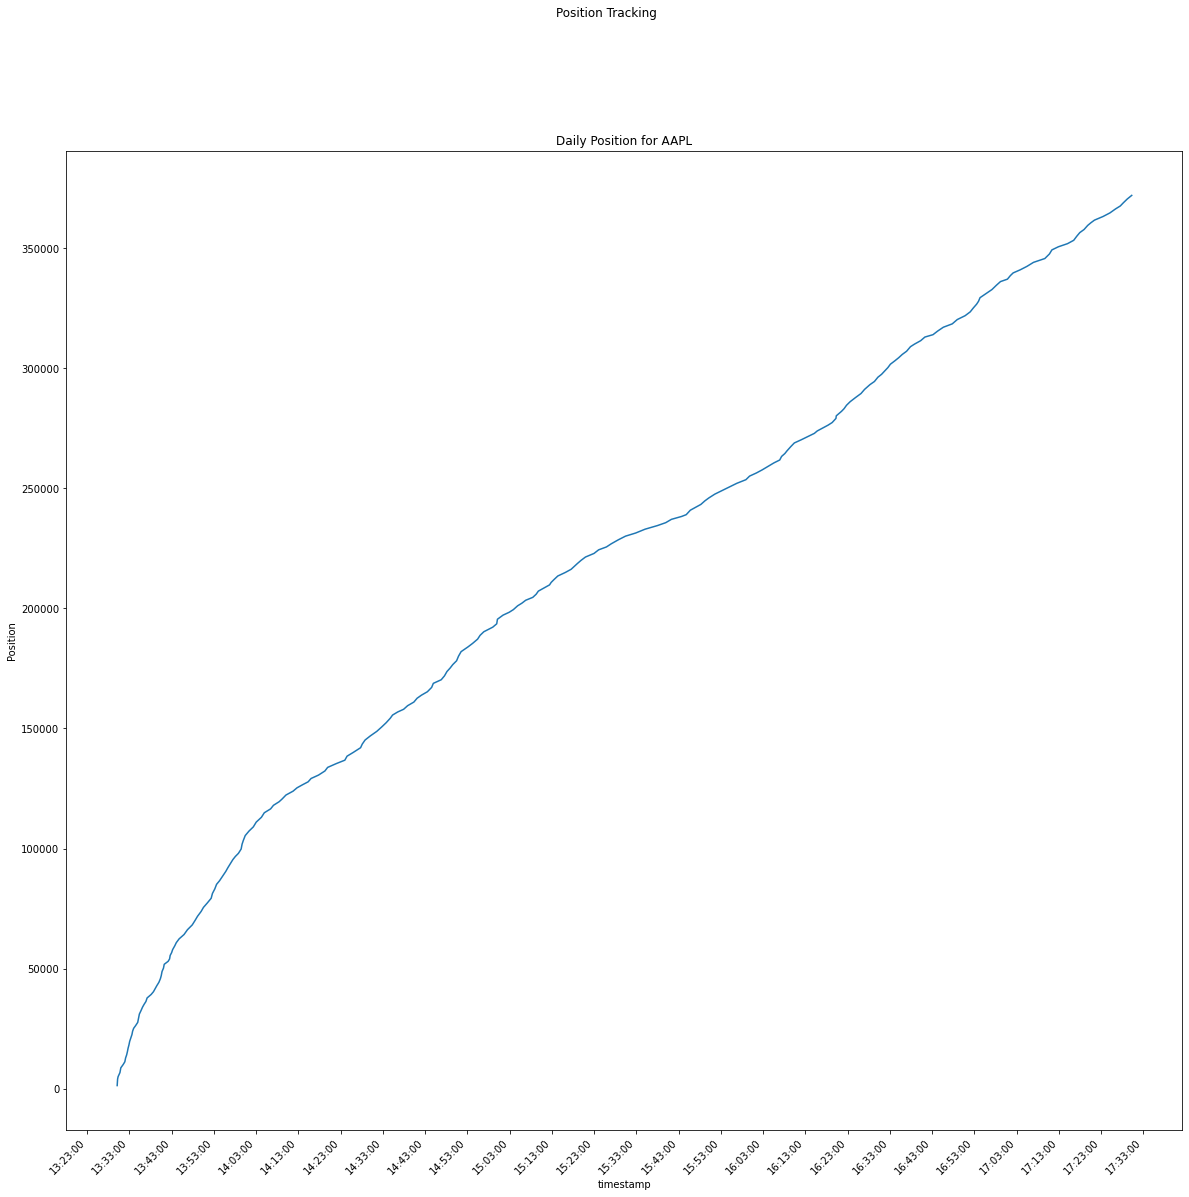

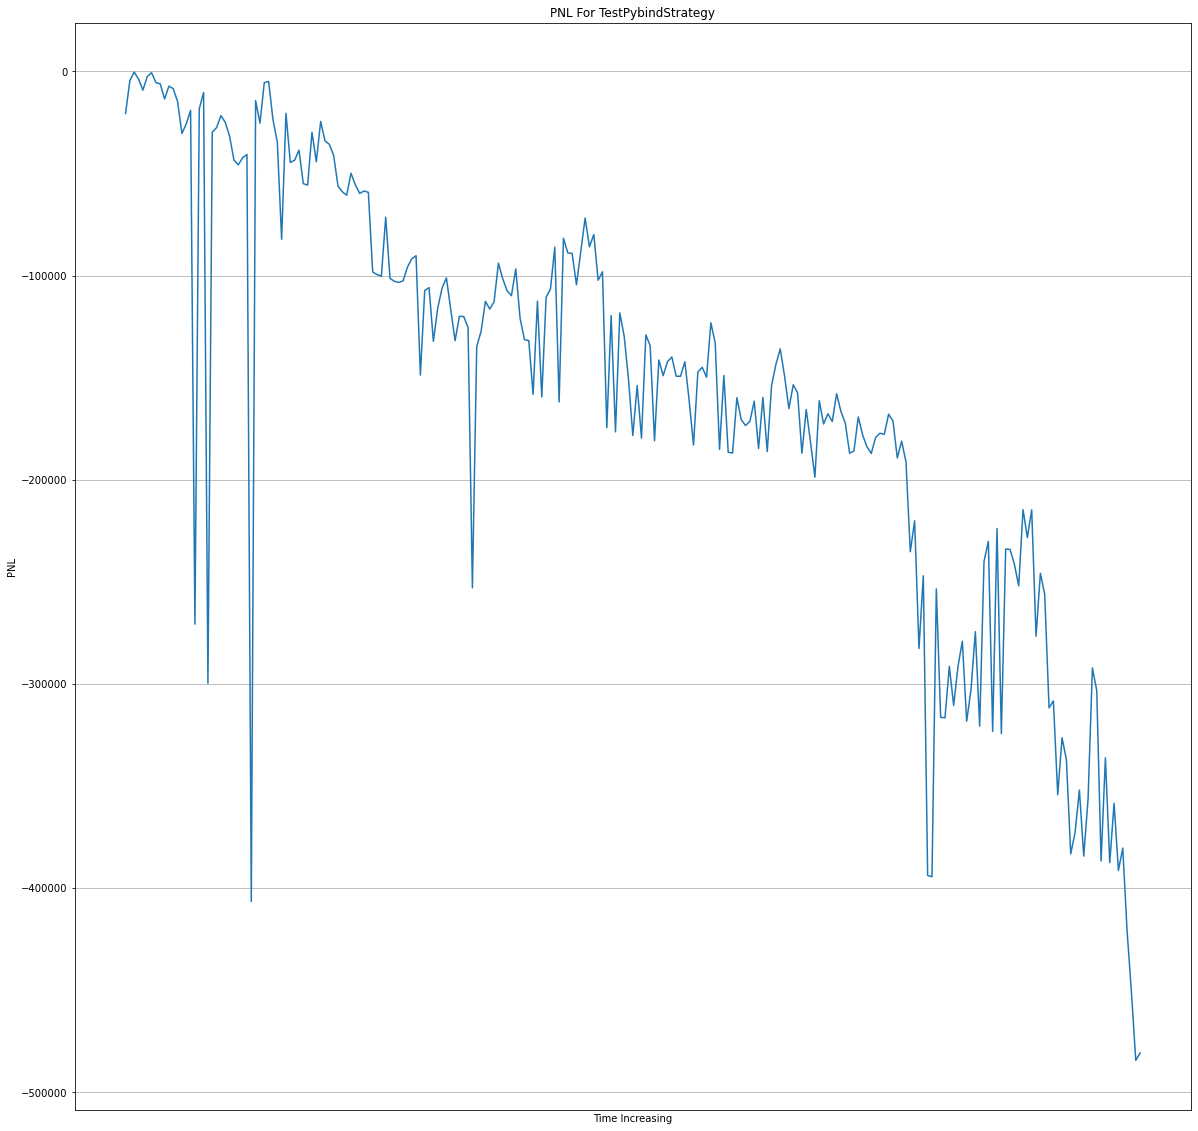

In [3]:
# Do data viz here
from position import plotPositions
from graphPNL import graphPNL

plotPositions()
graphPNL()

